In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('Sunspots.csv')
data.sample(5)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
2912,2912,1991-09-30,168.9
23,23,1750-12-31,125.7
1877,1877,1905-06-30,81.6
269,269,1771-06-30,199.2
2840,2840,1985-09-30,4.3


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


In [45]:
sunspots = data.iloc[:,-1]
sunspots.values

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

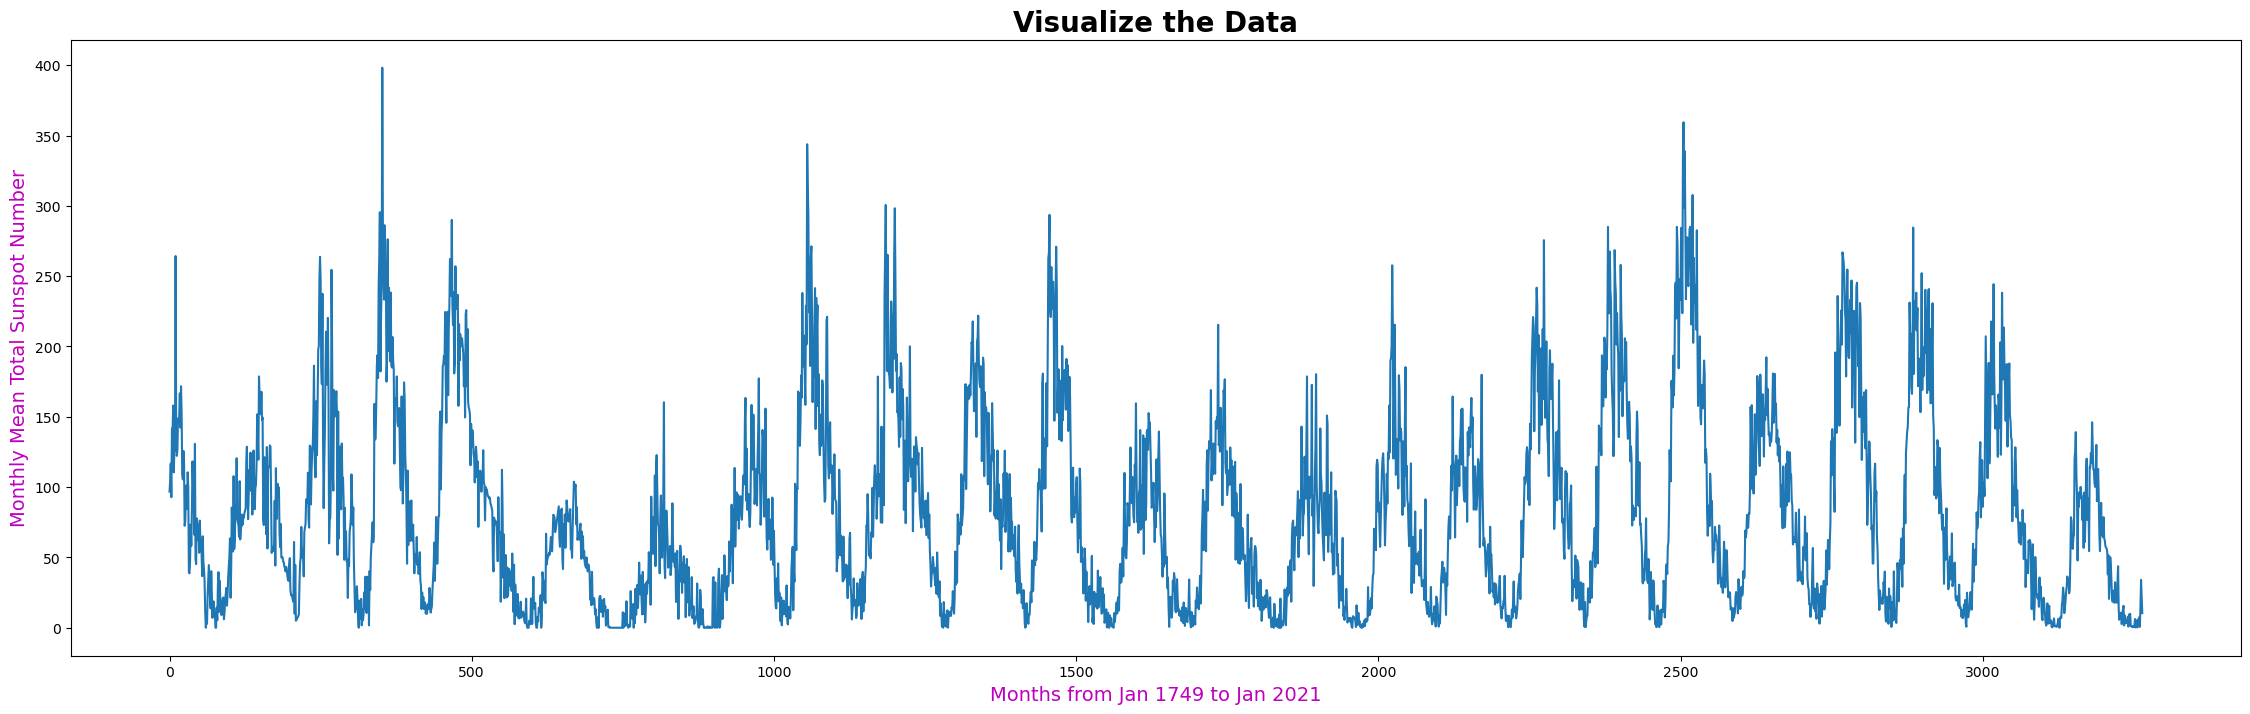

In [46]:
plt.figure(figsize=(28,8))
plt.plot(sunspots)
plt.ylabel(data.columns[-1], fontsize = 14, color = 'm')
plt.xlabel('Months from Jan 1749 to Jan 2021', fontsize = 14, color = 'm')
plt.title('Visualize the Data',fontsize = 20, color= 'black', weight = 'bold')
plt.show()

The first solar cycle started from 1755 but the sunspots data starts from 1749. That's a total of 6 years gap that is 72 months.

We can observe the initial part of the graph decreasing to minimum till the first 72 months.

Each solar cycle lasts approx. 11 years, that is about 132 months.
The current cycle is the solar cycle 25 whcih begun in December 2019 but the data is till January 2021. That is about 13 months data from the current cycle.

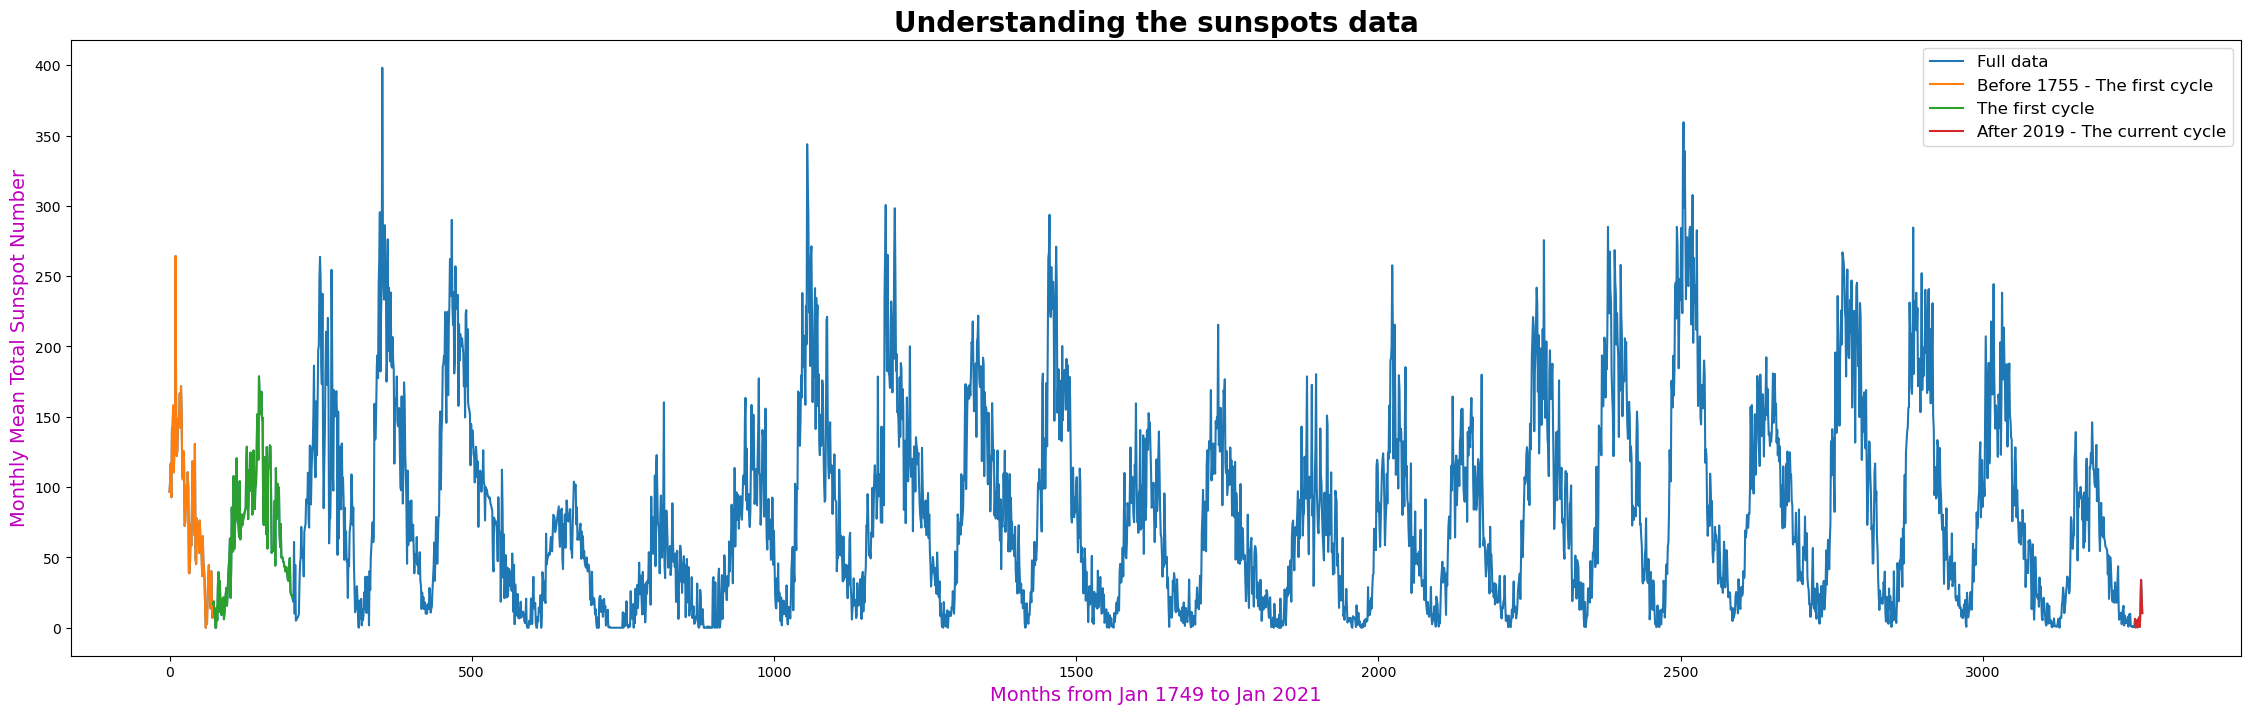

In [47]:
#Highlighting the above points in visualization
'''Approx 11 years cycle-->approx132months cycle'''
plt.figure(figsize=(28,8))
plt.plot(sunspots)              # whole data
plt.plot(sunspots[:72])         # data from 1749(actual cycle started from 1755--> 6 years that is 72 months)
plt.plot(sunspots[72:72+132])   # first cycle
plt.plot(sunspots[-13:])        # current cycle 
plt.ylabel(data.columns[-1], fontsize = 14, color = 'm')
plt.xlabel('Months from Jan 1749 to Jan 2021', fontsize = 14, color = 'm')
plt.title('Understanding the sunspots data',fontsize = 20, color= 'Black', weight = 'bold')
plt.legend(["Full data ", "Before 1755 - The first cycle", "The first cycle" , "After 2019 - The current cycle"], fontsize = 12)
plt.show()

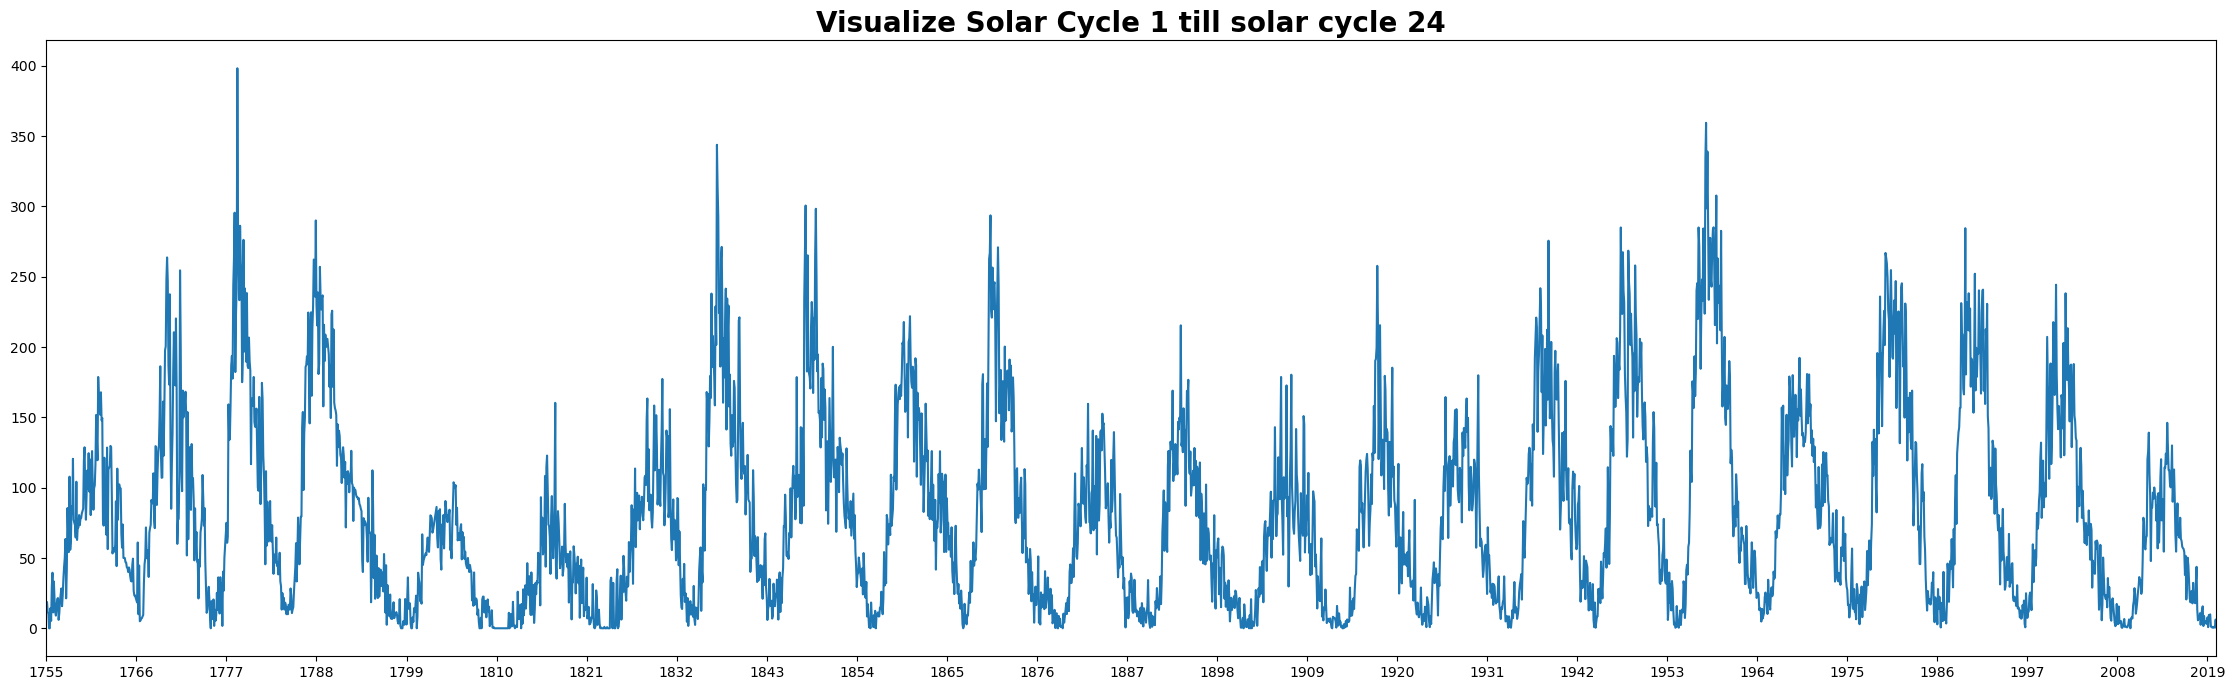

In [48]:
#for better visualization
#mismatched since approx. 11 years of cycle not exactly
years = []
start = 1755
for i in range(0, len(data.iloc[:,-1][72:]),132): #skipping 132 months
    years.append(start)
    start+=11

plt.figure(figsize=(28,8))
plt.plot(sunspots[72:])
plt.title('Visualize Solar Cycle 1 till solar cycle 24',fontsize = 20, color= 'black', weight = 'bold')
plt.xlim(72, 3265-12)
plt.xticks(range(72, len(sunspots),132))
plt.gca().set_xticklabels(years)  # highlighting the years
plt.show()

Some data are the outliers like for 4th cycle.
It started in 1784 rather than 1788 and lasted till 1798.
Hence, there is a mismatch.

Note: This is a noisy data some cycles have outliers values such as 400 whereas the maximum sunspots ever recorded is 285 in March 1958(Solar Cycle-19)
Well, such sequence of data points indexed in time order is referred to as Time Series data.


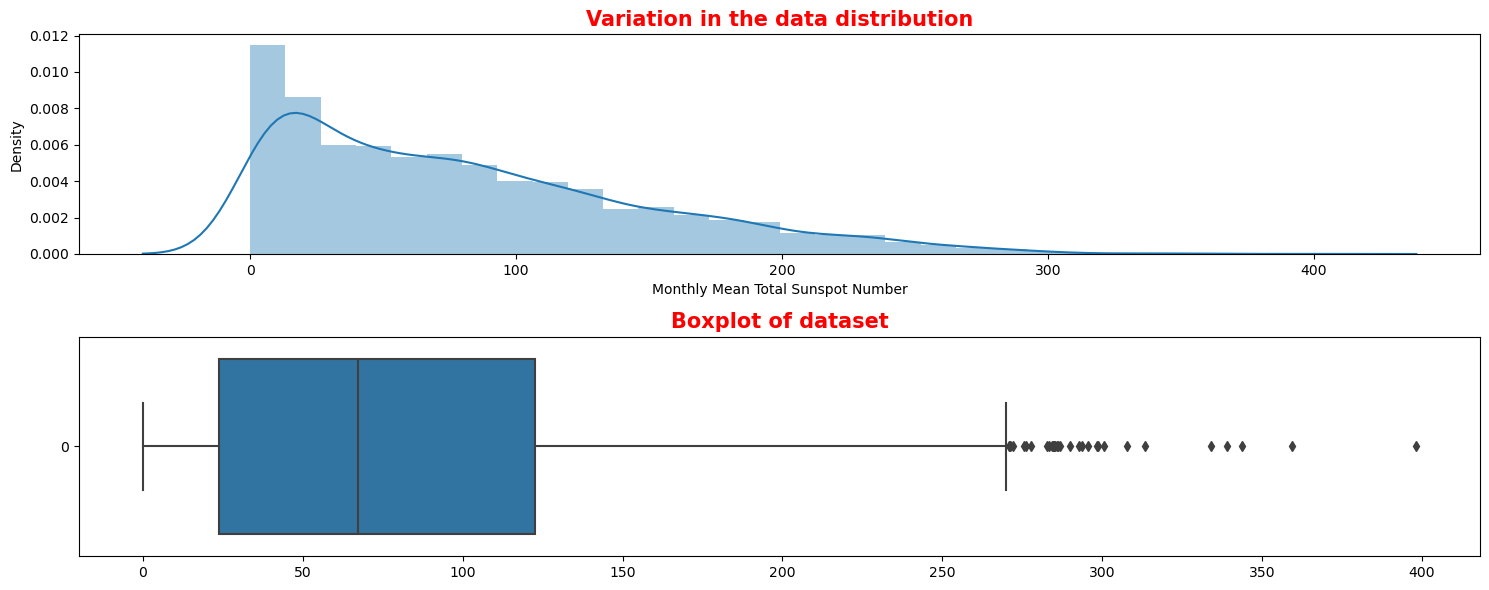

In [49]:
#visualize the variation in the data distribution along with the outliers in the time series data
plt.figure(figsize = (15,6))
plt.subplot(2, 1, 1)
sns.distplot(sunspots)
plt.title("Variation in the data distribution", fontsize = 15, color= 'r', weight = 'bold')
plt.subplot(2, 1, 2)
sns.boxplot(sunspots, orient='h')
plt.title("Boxplot of dataset", fontsize = 15, color = 'r', weight ='bold')
plt.tight_layout()
plt.show()

   Unnamed: 0        Date  Monthly Mean Total Sunspot Number  \
0           0  1749-01-31                               96.7   
1           1  1749-02-28                              104.3   
2           2  1749-03-31                              116.7   
3           3  1749-04-30                               92.8   
4           4  1749-05-31                              141.7   

   Monthly Mean Total Sunspot Number capped  
0                                      96.7  
1                                     104.3  
2                                     116.7  
3                                      92.8  
4                                     141.7  


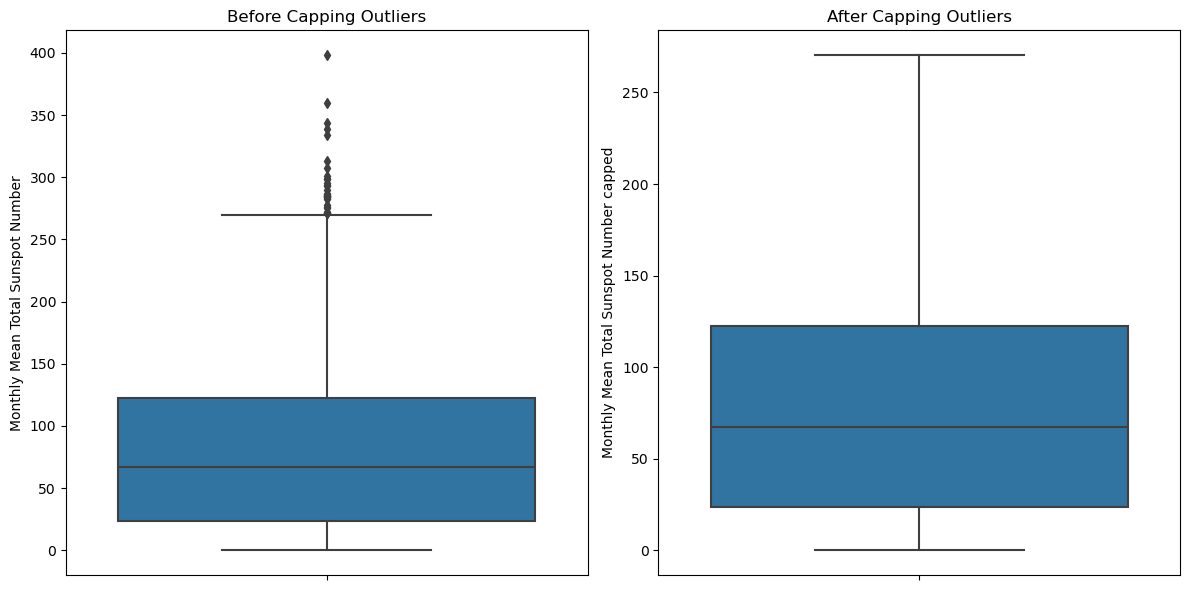

In [50]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Monthly Mean Total Sunspot Number'].quantile(0.25)
Q3 = data['Monthly Mean Total Sunspot Number'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
data['Monthly Mean Total Sunspot Number capped'] = data['Monthly Mean Total Sunspot Number'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Display the capped data
print(data.head())

# Visualize the original and capped data
plt.figure(figsize=(12, 6))

# Box plot before capping outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Monthly Mean Total Sunspot Number'])
plt.title('Before Capping Outliers')

# Box plot after capping outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Monthly Mean Total Sunspot Number capped'])
plt.title('After Capping Outliers')

plt.tight_layout()
plt.show()

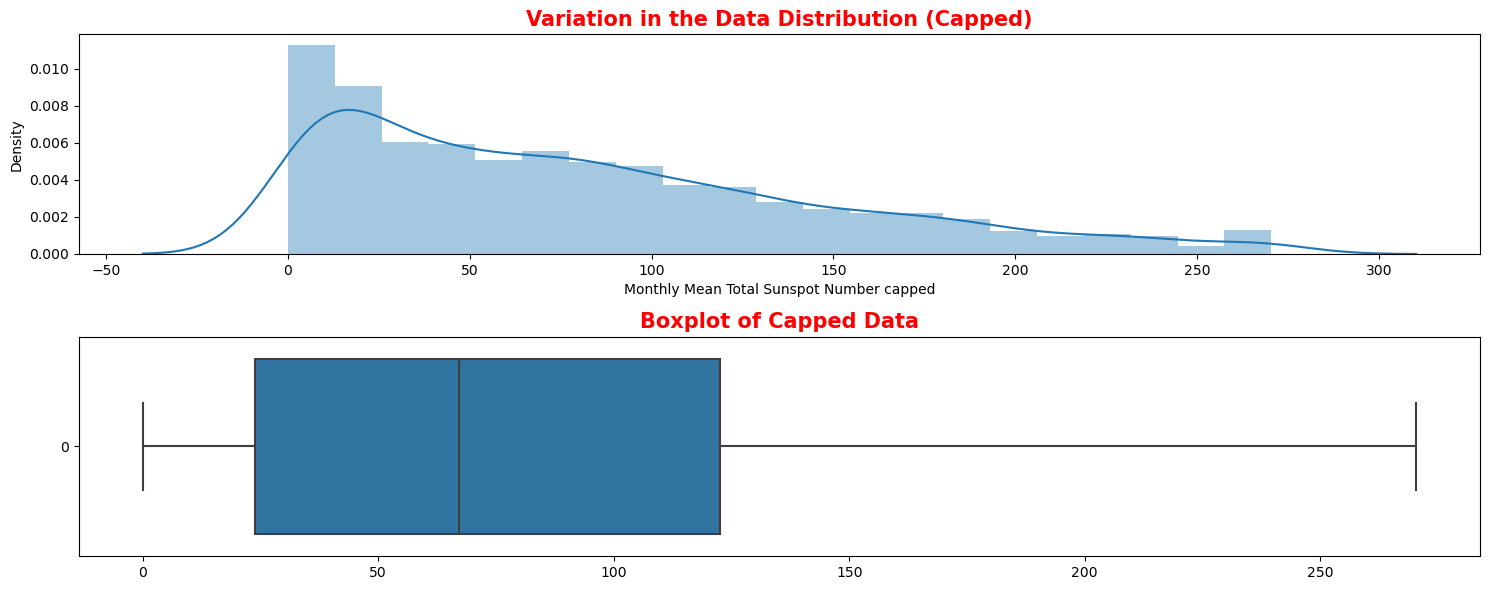

In [56]:
#visualize the variation in the data distribution along with the outliers in the time series data
plt.figure(figsize = (15,6))
plt.subplot(2, 1, 1)
sns.distplot(data['Monthly Mean Total Sunspot Number capped'], hist=True, kde=True)
plt.title("Variation in the Data Distribution (Capped)", fontsize=15, color='r', weight='bold')
plt.subplot(2, 1, 2)
sns.boxplot(data['Monthly Mean Total Sunspot Number capped'], orient='h')
plt.title("Boxplot of Capped Data", fontsize=15, color='r', weight='bold')
plt.tight_layout()
plt.show()

Sequence Models for time series data- RNN, LSTM